In [1]:
# Done -- linear regression, logistic regression
# Now -- decision tree, SVM
# then jaccard index, cosine similarity, weighted kernel density estimator
#
# regularlize all models -- later. I have a lot of data.
# train, cross validate  -- later. I need some predictive power.
#
# start with tech, then for all entries in my database 
# what predictors did greenberg use?
#
# duration Length of project in Days Double
# twitter_url Connected to twitter Boolean
# has_video Video present Boolean
# facebook_connected Connected to Facebook Boolean
# facebook_friends Number of facebook friends Integer
# twitter_followers Number of twitter followers Integer
# sent Sentiment (pos, neg, or neutral) String --
#      For the sentiment attribute, we used the Mashape Text-Processing API
# fkgl Grade level Double -FKGL stands for Flesch-Kincaid Grade Level (measures reading ability) 
#       from nltk
#sent_count Number of sentences in project description Integer
# see Tindle blog post


In [94]:
# Features I already have _______________________________________
# - rewards: n, min, max, intn shipping
# - n creator backed
# - title char len
# - blurb char len
# - launch time (in Unix time)
# - project duration
# - goal

# I could add easily 
# - day of the week
# - day of the month -- 1st/15st/30st
# - month
# - time between launch and ship of rewards -- most recent. 
# - title word len
# - blurb word len
# - body word length
# - readablity 
# - n misspellings
# - faq n questions/word len
# - risks and rewards word len
# - n pictures
# - other reward info


In [1]:
# useful links
# https://github.com/jakevdp/sklearn_scipy2013/blob/master/rendered_notebooks/06.1_validation_and_testing.ipynb
# http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support
# http://scikit-learn.org/stable/modules/ensemble.html
# http://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
from IPython.display import display
from IPython.core.pylabtools import getfigs
from sklearn import linear_model 
#import seaborn as sns

In [5]:
%matplotlib qt

In [6]:
#from extract_kickstarter_features import *
#%load_ext autoreload
#%autoreload 2

In [7]:
saveas_path = '/Users/jamie/insight data/figures/'

In [8]:
tech_df = pd.read_pickle('tech_df.save')

In [9]:
np.shape(tech_df)

(6633, 12)

In [10]:
tech_df.tail(3)

,id,pledged,goal,n rewards,min reward,max reward,intn ship,n creator backed,title n chars,blurb n chars,launch time,campaign dur
6630,16468,8904,5000,7,1,100,1,0,56,129,1411686079,3459600
6631,16469,615,50000,8,1,1000,0,0,51,103,1409441823,5184000
6632,16470,585549,7500,11,1,1337,1,2,44,114,1413159586,2595600


In [11]:
# create new columns 
tech_df['pledged/goal'] = tech_df['pledged']/tech_df['goal']

In [12]:
tech_df.tail(3)

,id,pledged,goal,n rewards,min reward,max reward,intn ship,n creator backed,title n chars,blurb n chars,launch time,campaign dur,pledged/goal
6630,16468,8904,5000,7,1,100,1,0,56,129,1411686079,3459600,1.7808
6631,16469,615,50000,8,1,1000,0,0,51,103,1409441823,5184000,0.0123
6632,16470,585549,7500,11,1,1337,1,2,44,114,1413159586,2595600,78.0732


In [13]:
#let's find some data stories!

In [14]:
# restrict to projects with goals of less than $500,000
reasonable_goal_is = np.where(tech_df['goal'] < 500000)[0]
print np.shape(reasonable_goal_is)

(6546,)


In [15]:
# restrict to projects with goals of less than $50,000
small_goal_is = np.where(tech_df['goal'] < 25000)[0]
print np.shape(small_goal_is)

(3886,)


In [16]:
# now try a logistic regression ___________
tech_df.ix[:,'outcomes'] = 0
tech_df.ix[tech_df['pledged'] >= tech_df['goal'],'outcomes'] = 1

In [17]:
tech_df.tail(5)

,id,pledged,goal,n rewards,min reward,max reward,intn ship,n creator backed,title n chars,blurb n chars,launch time,campaign dur,pledged/goal,outcomes
6628,16461,25,100000,5,25,10000,-1,0,35,134,1414879251,2595600,0.00025,0
6629,16462,15790,3500,8,59,250,1,1,36,132,1411511254,2592000,4.511429,1
6630,16468,8904,5000,7,1,100,1,0,56,129,1411686079,3459600,1.7808,1
6631,16469,615,50000,8,1,1000,0,0,51,103,1409441823,5184000,0.0123,0
6632,16470,585549,7500,11,1,1337,1,2,44,114,1413159586,2595600,78.0732,1


In [71]:
# removed launch time. replace with time of day, day of week, month
#predictor_cols = list(['goal','n rewards','min reward','max reward','intn ship','n creator backed','title n chars','blurb n chars','campaign dur'])
predictor_cols = list(['n rewards','min reward','max reward','intn ship','n creator backed','title n chars','blurb n chars','campaign dur'])

predictors = tech_df.ix[:,predictor_cols]

In [19]:
# I need to train and test this.
clf = linear_model.LogisticRegression()
clf.fit(predictors.ix[small_goal_is,:],tech_df.ix[small_goal_is,'outcomes'])
clf.coef_


array([[ -5.70416186e-05,   4.87435326e-06,  -4.88537285e-05,
          6.37065362e-05,   5.68284321e-07,   8.36966921e-06,
          5.41117328e-06,  -3.07871009e-06,  -1.21687950e-07]])

In [20]:
# next try an svm, random forests. I'll need to scale it. 
# http://scikit-learn.org/stable/modules/svm.html
# http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
#
# I think I need more predictors, nlp, and a distribution 
# latent variable analysis?

In [21]:
# now trying a decision tree since it's easy, worked for Greenberg and Parado.
# http://scikit-learn.org/stable/modules/tree.html

In [44]:
X = predictors.ix[small_goal_is,:].values
n_points = np.shape(X)[0]
X_i = range(n_points)

y = tech_df.ix[small_goal_is,'outcomes'].values

In [45]:
print n_points

3886


In [46]:
# for now use all of the data --
from sklearn.tree import DecisionTreeClassifier
clf_1 = DecisionTreeClassifier(max_depth=5)
clf_1.fit(X,y)
y_1 = clf_1.predict(X)

In [47]:
# Plot the results
plt.figure()
plt.scatter(X_i, y, c="k", label="data")

In [48]:
plt.plot(X_i, y_1, c="g", label="max_depth=5", color='g')
#plt.plot(X_i, y_2, c="r", label="max_depth=2", color='r')
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
#plt.legend()

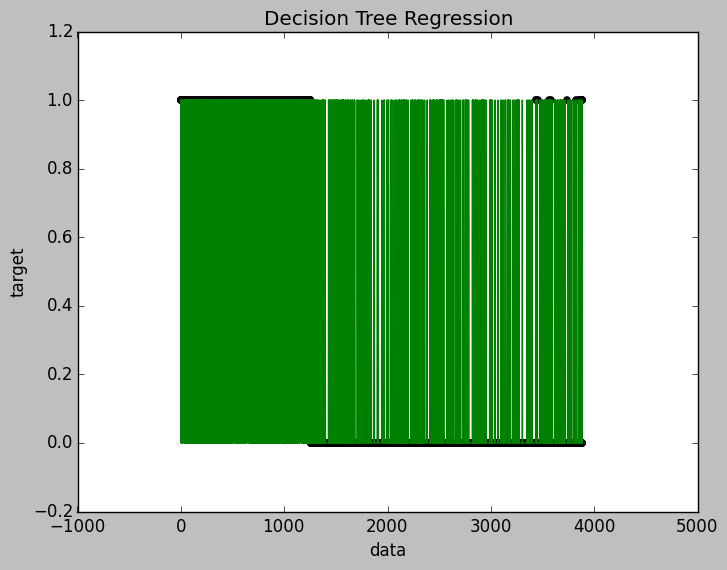

In [49]:
display(plt.gcf())
#plt.close('all')

In [50]:
# how do I interpret my decision tree? 
# what features are important? 
# how do I pick my levels -- while cross validating? 

In [51]:
# now determine how well this classifies. 
# what is the baseline? count
n_success = sum(tech_df['outcomes'])

In [52]:
n_points = 3886.0

In [53]:
print n_success/3886.0

0.479413278435


In [54]:
# look at recall, precision, F statistics

In [55]:
sum(y == y_1)/n_points

0.75630468347915591

In [103]:
# decision tree predicts with 76% accuracy! nice!
# did I include any inapporopiate variables? 
# now separate training, test, cross validate
# write nice code. check. also look at linear models, pledged/goal.
# which features are important? 
# then add more features.

In [72]:
# now try with all data points, then goals < 500,000
X = predictors
n_points = np.shape(X)[0]
X_i = range(n_points)

y = tech_df.ix[:,'outcomes']

In [73]:
# for now use all of the data --
from sklearn.tree import DecisionTreeClassifier
clf_all = DecisionTreeClassifier(max_depth=5)
clf_all.fit(X,y)
y_1 = clf_all.predict(X)

In [74]:
# Plot the results
plt.figure()
plt.scatter(X_i, y, c="k", label="data")

plt.plot(X_i, y_1, c="g", label="max_depth=5", color='g')
#plt.plot(X_i, y_2, c="r", label="max_depth=2", color='r')
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")

In [75]:
float(sum(y == y_1))/n_points

0.7557666214382632

In [76]:
print n_points

6633


In [77]:
clf_all.feature_importances_

array([ 0.21846451,  0.00381828,  0.07141482,  0.01236758,  0.65530816,
        0.        ,  0.01104112,  0.02758553])

In [78]:
print X.columns

Index([u'n rewards', u'min reward', u'max reward', u'intn ship',
       u'n creator backed', u'title n chars', u'blurb n chars',
       u'campaign dur'],
      dtype='object')


In [83]:
print round(n_points*.6)

3980.0


In [84]:
# now use training (60%), validatation (20%), and test (20%) sets 
i_order = np.random.permutation(n_points)
train_max_i = int(round(n_points*.6))
validate_max_i = int(round(n_points*.8))

train_is = i_order[:train_max_i]
validate_is = i_order[train_max_i:validate_max_i]
test_is = i_order[validate_max_i:]

In [86]:
# for now use all of the data --
from sklearn.tree import DecisionTreeClassifier
clf_all = DecisionTreeClassifier(max_depth=5)
clf_all.fit(X.ix[train_is,:],y[train_is])
y_1 = clf_all.predict(X.ix[test_is,:])

In [87]:
float(sum(y[test_is] == y_1))/len(test_is)

0.7422758100979653

In [88]:
# classifier still does well with cross validation! nice!

In [89]:
clf_all.feature_importances_

array([ 0.19147826,  0.        ,  0.0856383 ,  0.0223119 ,  0.60920773,
        0.01797464,  0.03331894,  0.04007023])

In [90]:
# n backed is very important. what if I take it out? 
# how do trees handle mulicolinearlity? 

In [92]:
# calc F score -- 
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html#sklearn.metrics.precision_recall_fscore_support